# Lösungen zu den Python-Aufgaben aus LE3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Aufgabe 16

Rekapitulation aus der Übung aus LE1:

In [2]:
X = np.array([
    [-2, -4, -6, 6, -8, 6, 3, 6, 8, -9, -1, 1, 4, 2, 2, 2, -1, -1, 2, 2],
    [ -3, -7, -13, 16, -14, 14, 6, 11, 18, -19, 5, 0, 3, 3, 6, 8, -3, -1, 0, 9]
])

XXT = np.dot(X, X.T)
ew, ev = np.linalg.eig( XXT)

v1 = ev[:,0]
v2 = ev[:,1]

### a)

Eigenwerte absteigend nach Grösse sortieren:

In [3]:
sorting = np.argsort(ew)[::-1]
v1 = ev[:,sorting][:,0]
v2 = ev[:,sorting][:,1]
lambda1 = ew[sorting][0]
lambda2 = ew[sorting][1]

Graphische Darstellung:

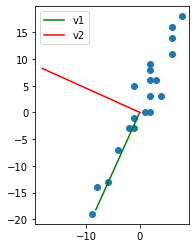

In [4]:
plt.scatter(X[0,:], X[1,:])
plt.plot( [0,v1[0]*20], [0,v1[1]*20], c="green", label="v1" )
plt.plot( [0,v2[0]*20], [0,v2[1]*20], c="red", label="v2" )
plt.gca().set_aspect("equal")
plt.legend()

Basistransformation:

In [5]:
T = ev[:,sorting]
T

array([[-0.41121301, -0.91153928],
       [-0.91153928,  0.41121301]])

$T^{-1}$ sollte $\mathbf{v}_1$ auf $\mathbf{e}_1$ und $\mathbf{v}_2$ auf $\mathbf{e}_2$ abbilden:

In [6]:
np.round( np.linalg.inv(T).dot(ev[:,sorting]),10 )

array([[ 1., -0.],
       [-0.,  1.]])

T ist übrigens orthogonal:

In [7]:
np.round( T.dot(T.T), 10 )

array([[ 1., -0.],
       [-0.,  1.]])

und damit gilt $T^{-1} = T^T$.

### b)

Messpunkte mit $T^T$ in Eigenbasis transformieren:

In [8]:
X_EB = T.T.dot(X)

Visualisieren:

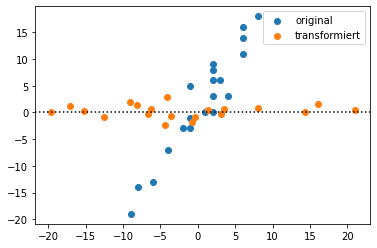

In [9]:
plt.scatter(X[0,:], X[1,:], label="original")
plt.scatter(X_EB[0,:], X_EB[1,:], label="transformiert")
plt.axhline(0, c="black", ls=":")
plt.legend()

Die Hauptvariationsachse ('1. Hauptkomponente') wurde auf die $x$-Achse gedreht!

### c) Mit Standardisierung

In [10]:
Xs = (X - np.mean(X, axis=1).reshape(-1,1)) / np.std(X, axis=1).reshape(-1,1)
Xs.shape

(2, 20)

In [11]:
XXTs = Xs.dot(Xs.T)
XXTs.shape

(2, 2)

In [12]:
ew, ev = np.linalg.eig( Xs.dot(Xs.T) )
ew

array([ 0.89103208, 39.10896792])

In [13]:
sorting = np.argsort(ew)[::-1]
v1 = ev[:,sorting][:,0]
v2 = ev[:,sorting][:,1]
lambda1 = ew[sorting][0]
lambda2 = ew[sorting][1]

In [14]:
T = ev[:,sorting]
X_EB = T.T.dot(Xs)

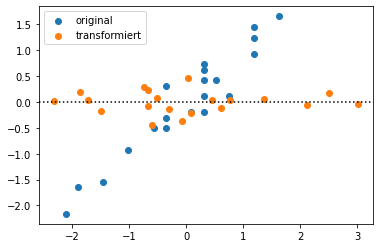

In [15]:
plt.scatter(Xs[0,:], Xs[1,:], label="original")
plt.scatter(X_EB[0,:], X_EB[1,:], label="transformiert")
plt.axhline(0, c="black", ls=":")
plt.legend()

### Interpretation

Mit der Transformation $T$ bringen wir die Daten $X$ in die Eigenbasis von $XX^T$. Wechseln wir in die Eigenbasis von $XX^T$, so wird diese diagonalisiert:

In [16]:
np.round( T.T.dot(XXTs).dot(T), 10 )

array([[39.10896792,  0.        ],
       [ 0.        ,  0.89103208]])

In [17]:
ew[sorting]

array([39.10896792,  0.89103208])

Im Falle von standardskalierten Daten entspricht $XX^T$ der Kovarianzmatrix der Daten in $X$. Alle Korrelation zwischen $x$ und $y$ wurde mit dieser Rotation also eliminiert. Es verbleiben die transformierten Vektoren mit zwei Komponenten, die erste wird *erste Hauptkomponente* und die zweite *zweite Hauptkomponente* genannt. Die erste Hauptkomponente ist die zum grössten Eigenwert, die zweite die zum zweitgrössten Eigenwert, etc. Die erste Hauptkomponente beinhaltet den grössten Teil der Varianz in den Daten, die zweite Hauptkomponente den zweitgrössten Teil, etc. In diesem Fall enthält die erste Hauptkomponente (x-Achse) den Hauptteil der Varianz und auf der y-Achse bleibt nur noch ein kleiner Teil der Varianz übrig. Hier könnte gut die zweite Hauptkomponente entfernt werden, die erste enthält trotzdem noch den wichtigsten Teil der Information:

In [18]:
x = Xs[0,:]
x.shape

(20,)

Rücktransformation der 'komprimierten' Daten:

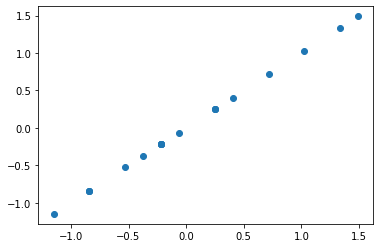

In [19]:
Z = T.dot( np.vstack( [x, np.zeros_like(x)] ) )
plt.scatter(Z[0,:], Z[1,:])

Natürlich sind die Punkte jetzt nur noch entlang von $\mathbf{v}_1$ verteilt. Das 'Rauschen' entlang von $\mathbf{v}_2$ ist bei der Komprimierung verlorengegangen.

Diese Methode wird **Hauptkomponentenanalyse (Principal Component Analysis, PCA)** genannt, ihr werdet sie in der *Grundkompetenz Machine Learning* noch genauer kennenlernen. Das Prinzip ist einfach: Rotiere die Daten so, dass die Kovarianzmatrix diagonal wird und die Richtung entlang des Eigenvektors zum grössten Eigenwert in die 1. Hauptkomponente zu liegen kommt, etc.